# Predicting House Sale Prices with Linear Regression

In this project, I will build a pipeline of functions to run scikit-learn's linear regression model to predict the sale price of homes in Ames, Iowa. The pipeline will let me quickly iterate on different models. The final pipeline is at the end of this notebook.

First I'll import the necessary modules. 

In [1]:
#Import Modules
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

## Data Exploration
I am going to work with housing data for the city of Ames, Iowa, in the United States from 2006 to 2010. The data set contains 2930 observations and a 80 explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values. For information on why the data was collected go [here](https://doi.org/10.1080/10691898.2011.11889627). More information about the different columns in the data can be found [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

In [2]:
data = pd.read_csv('AmesHousing.tsv', delimiter="\t")
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
data.shape

(2930, 82)

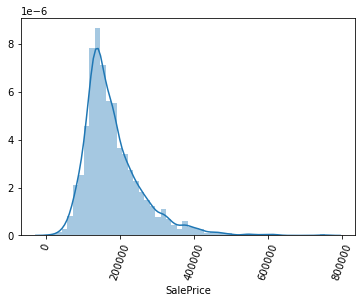

In [4]:
ax = sns.distplot(data['SalePrice'])
plt.xticks(rotation=70)
plt.show()

The above distribution plot for the `Sale Price` column is skewed to the right so the modeling may not be useful for high price houses.

## Initiate Pipeline

The pipeline will contain three main functions that will let me quickly iterate on different models.

- `transform_features` function will be used for feature engineering
- `select_features` function will be sued to select features 
- `train_and_test` function trains and tests the model using linear regression and returns the RMSE error metric

I will start with the `train_and_test` function

In [5]:
def transform_features(df):
    return df

def select_features(df):
    return df[['Gr Liv Area','SalePrice']]

def train_and_test(df):
    train = df.iloc[:1460]
    test = df.iloc[1460:]
    
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    features = numeric_train.columns.drop("SalePrice")
    model = linear_model.LinearRegression()
    model.fit(train[features], train["SalePrice"])
    predictions = model.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [6]:
transform_df = transform_features(data)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

57088.25161263909

## Feature Engineering

I need to remove features with many missing values, dive deeper into potential categorical features, and transform text and numerical columns. I will eventually update the `transform_features` function to take of this, but before that I will do some data exploration to verify what I will be removing and cleaning.

#### Columns with 5% or more missing values will be dropped

In [7]:
# All columns: Find any with 5% or more missing values.
num_missing = data.isnull().sum().sort_values(ascending=False)
drop_missing_cols = num_missing[(num_missing > len(data)/20)].sort_values()
drop_missing_cols

Garage Type       157
Garage Qual       159
Garage Yr Blt     159
Garage Cond       159
Garage Finish     159
Lot Frontage      490
Fireplace Qu     1422
Fence            2358
Alley            2732
Misc Feature     2824
Pool QC          2917
dtype: int64

#### Text columns with 1 or more missing values will be dropped

In [8]:
# Text columns: Find any with 1 or more missing values.
text_mv_counts = data.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
drop_missing_cols_2

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Fireplace Qu      1422
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Qual           80
Bsmt Cond           80
Mas Vnr Type        23
Electrical           1
dtype: int64

#### Numerical columns with missing values will be filled with the column mode

In [9]:
#Numerical columns: Find columns with missing values.
num_missing = data.select_dtypes(include=['int', 'float']).isnull().sum()
fixable_numeric_cols = num_missing[(num_missing < len(data)/20) & (num_missing > 0)].sort_values(ascending=False)
fixable_numeric_cols

Mas Vnr Area      23
Bsmt Half Bath     2
Bsmt Full Bath     2
Garage Area        1
Garage Cars        1
Total Bsmt SF      1
Bsmt Unf SF        1
BsmtFin SF 2       1
BsmtFin SF 1       1
dtype: int64

In [10]:
#Numerical columns: Find mode of columns with missing values
replacement_values_dict = data[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
replacement_values_dict

{'Mas Vnr Area': 0.0,
 'Bsmt Half Bath': 0.0,
 'Bsmt Full Bath': 0.0,
 'Garage Area': 0.0,
 'Garage Cars': 2.0,
 'Total Bsmt SF': 0.0,
 'Bsmt Unf SF': 0.0,
 'BsmtFin SF 2': 0.0,
 'BsmtFin SF 1': 0.0}

#### Creating new Features
There are two columns that represent time, `Year Built`, and `Year Remod/Add`. To better capture the information and be able to use it in the model, I am going to calculate two new columns that contain the number of years since construction or remodel/addition at time of sale. The data of these two new columns should be positive values. I'll also check for negative values.

In [11]:
# Calculate House age
years_sold = data['Yr Sold'] - data['Year Built']
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [12]:
# Calcluate Years since remodel 
years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

There are only four invalid values so I'll drop the rows containing these values. I will also remove the original year columns.

## Update `transform_features` Function
I will now update the `transform_features` function to incorporate the edits I've discussed. I will also drop columns that: 
- are aren't useful for machine learning, or 
- that leak data about the final sale. More information about the columns can be found [here](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt). 

In [13]:
def transform_features(df):
    # All columns: Drop any with 5% or more missing values for now.
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)
    
    # Text columns: Drop any with 1 or more missing values for now.
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    
    #Numerical columns: For columns with missing values, fill in with the column mode
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    df = df.fillna(replacement_values_dict)
    
    #House age and years since remodel
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)
    df = df.drop(["Year Remod/Add", "Year Built"], axis=1)

    ## Drop columns that aren't useful for ML
    df = df.drop(["PID", "Order"], axis=1)

    ## Drop columns that leak info about the final sale
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
    return df

def select_features(df):
    return df[['Gr Liv Area','SalePrice']]

def train_and_test(df):
    train = df.iloc[:1460]
    test = df.iloc[1460:]
    
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    features = numeric_train.columns.drop("SalePrice")
    model = linear_model.LinearRegression()
    model.fit(train[features], train["SalePrice"])
    predictions = model.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [14]:
transform_df = transform_features(data)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

55275.36731241307

## Feature Selection

Now that the features are all cleaned and transformed, it is time to move on to feature selection.

### Numerical Feature Selection
I will begin by calculating the correlation coefficients for the numerical column and filter those absolute values are greater than 0.3.

In [15]:
numerical_df = transform_df.select_dtypes(include=['int', 'float'])
numerical_df.head(5)

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Before Sale,Years Since Remod
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0,215000,50,50
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,105000,49,49
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,172000,52,52
3,20,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0,244000,42,42
4,60,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,189900,13,12


In [16]:
## I'll only keep columns with a correlation coefficient of larger than 0.3 (arbitrary, worth experimenting later)
abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values(ascending=False)
correlated_cols = abs_corr_coeffs[abs_corr_coeffs > 0.3]
correlated_cols

SalePrice            1.000000
Overall Qual         0.801206
Gr Liv Area          0.717596
Garage Cars          0.648361
Total Bsmt SF        0.644012
Garage Area          0.641425
1st Flr SF           0.635185
Years Before Sale    0.558979
Full Bath            0.546118
Years Since Remod    0.534985
Mas Vnr Area         0.506983
TotRms AbvGrd        0.498574
Fireplaces           0.474831
BsmtFin SF 1         0.439284
Wood Deck SF         0.328183
Open Porch SF        0.316262
Name: SalePrice, dtype: float64

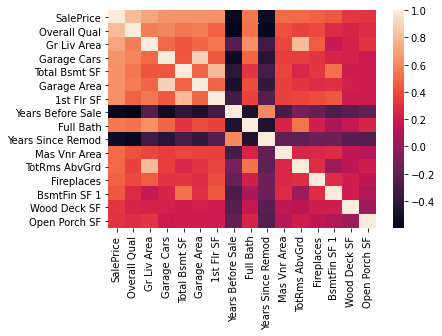

In [17]:
corrmat = transform_df[correlated_cols.index].corr()
sns.heatmap(corrmat)

Based on the correlation matrix heatmap, I can tell that the following pairs of columns are strongly correlated:
- `Gr Liv Area` and `TotRms AbvGrd`
- `Garage Area` and `Garage Cars`

Looking at the data documentation, I can tell that each pair of columns reflects very similar information. Because `Gr Liv Area` and `Garage Area` are continuous variables that capture more nuance, I'll drop the `TotRms AbvGrd` and `Garage Cars`.

### Categorical Feature Selection
All of the columns that can be categorized as nominal variables are candidates for being converted to categorical.

In [18]:
## From documentation, these columns are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [19]:
## Which categorical columns are in the transfromed data
transform_cat_cols = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)

transform_cat_cols

['MS SubClass',
 'MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air']

In [20]:
# How many uique values are in each category?
uniqueness_counts = transform_df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
uniqueness_counts

Central Air      2
Street           2
Land Contour     4
Lot Config       5
Bldg Type        5
Heating          6
Roof Style       6
Foundation       6
MS Zoning        7
Condition 2      8
House Style      8
Roof Matl        8
Condition 1      9
Exterior 1st    16
MS SubClass     16
Exterior 2nd    17
Neighborhood    28
dtype: int64

Now I'll check which categorical columns have few unique values with more than 95% of the values in the column belong to a specific category. These columns would be similar to low variance numerical features (no variability in the data for the model to capture), and good candidates to remove.

In [21]:
# Which categories have low variance?
num_rows = len(transform_df)
low_variance_cols = []
for col in transform_cat_cols:
    unique_values = transform_df[col].value_counts()
    for value in unique_values:
        if value > 0.95*num_rows:
            low_variance_cols.append(col)
            break    
            
low_variance_cols

['Street', 'Condition 2', 'Roof Matl', 'Heating']

## Update `select_features` Function

I will now incorporate the above edits into the function pipeline.

In [22]:
def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    #Only keep columns with correlation coefficent above threshold
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    #Drop strongly correlated columns
    try:
        df = df.drop(columns = ['TotRms AbvGrd', 'Garage Cars'])
    
    finally:
    
        #List of nominal columns according to the documentation
        nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                        "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                        "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                        "Misc Feature", "Sale Type", "Sale Condition"]

        #Make the list of nomial features that belongs to df 
        transformed_cat_cols = []
        for col in nominal_features:
            if col in df.columns:
                transformed_cat_cols.append(col)

         #Remove the columns with more than 10 unique values
        for col in transformed_cat_cols:
            if len(df[col].value_counts()) > uniq_threshold:
                transformed_cat_cols.remove(col)
                df = df.drop(columns = [col])       

        #Find and remove low variance columns
        num_rows = len(df)
        low_variance_cols = []
        for col in transformed_cat_cols:
            unique_values = df[col].value_counts()
            for value in unique_values:
                if value > 0.95*num_rows:
                    low_variance_cols.append(col)
                    break
        for col in low_variance_cols:
            transformed_cat_cols.remove(col)
        df = df.drop(columns = low_variance_cols)


        #Change the type of the transformed_cat_cols columns to category
        for col in transformed_cat_cols:
            df[col] = df[col].astype('category')

        # Create dummy columns and add back to the dataframe!
        df = pd.concat([
            df, 
            pd.get_dummies(df.select_dtypes(include=['category']))
        ], axis=1).drop(transformed_cat_cols,axis=1)

        return df

In [23]:
transform_df = transform_features(data)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

34401.657765602904

## Control the type of Cross Validation
Lastly I'll add a parameter named k to the `train_and_test` function that controls the type of cross validation that occurs.
- When k equals 0, perform holdout validation (what we already implemented)
- When k equals 1, perform simple cross validation
- When k is greater than 0, perform k-fold cross validation 


In [24]:
def train_and_test(df, k):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    model = linear_model.LinearRegression()
    
    if k ==0:
        train = df.iloc[:1460]
        test = df.iloc[1460:]
        
        model.fit(train[features], train["SalePrice"])
        predictions = model.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)
        
        return rmse
    
    if k ==1:
        #Shuffle the ordering of the rows in the data frame.
        shuffled_df = df.sample(frac=1, )
        fold_one = df[:1460]
        fold_two = df[1460:]
        
        model.fit(fold_one[features], fold_one["SalePrice"])
        predictions = model.predict(fold_two[features])
        mse_one = mean_squared_error(fold_two["SalePrice"], predictions)
        rmse_one = np.sqrt(mse)
        
        model.fit(fold_two[features], fold_two["SalePrice"])
        predictions_two = model.predict(fold_one[features])        
        mse_two = mean_squared_error(fold_one["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        return avg_rmse
    
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            model.fit(train[features], train["SalePrice"])
            predictions = model.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

## Final Pipeline
Now I'll put all the functions in one cell (for reference) and run

In [25]:
def transform_features(df):
    # All columns: Drop any with 5% or more missing values for now.
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)
    
    # Text columns: Drop any with 1 or more missing values for now.
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    
    #Numerical columns: For columns with missing values, fill in with the column mode
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    df = df.fillna(replacement_values_dict)
    
    #House age and years since remodel
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)
    df = df.drop(["Year Remod/Add", "Year Built"], axis=1)

    ## Drop columns that aren't useful for ML
    df = df.drop(["PID", "Order"], axis=1)

    ## Drop columns that leak info about the final sale
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
    return df

def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    #Only keep columns with correlation coefficent above threshold
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    #Drop strongly correlated columns
    try:
        df = df.drop(columns = ['TotRms AbvGrd', 'Garage Cars'])
    
    finally:
    
        #List of nominal columns according to the documentation
        nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                        "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                        "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                        "Misc Feature", "Sale Type", "Sale Condition"]

        #Make the list of nomial features that belongs to df 
        transformed_cat_cols = []
        for col in nominal_features:
            if col in df.columns:
                transformed_cat_cols.append(col)

         #Remove the columns with more than 10 unique values
        for col in transformed_cat_cols:
            if len(df[col].value_counts()) > uniq_threshold:
                transformed_cat_cols.remove(col)
                df = df.drop(columns = [col])       

        #Find and remove low variance columns
        num_rows = len(df)
        low_variance_cols = []
        for col in transformed_cat_cols:
            unique_values = df[col].value_counts()
            for value in unique_values:
                if value > 0.95*num_rows:
                    low_variance_cols.append(col)
                    break
        for col in low_variance_cols:
            transformed_cat_cols.remove(col)
        df = df.drop(columns = low_variance_cols)


        #Change the type of the transformed_cat_cols columns to category
        for col in transformed_cat_cols:
            df[col] = df[col].astype('category')

        # Create dummy columns and add back to the dataframe!
        df = pd.concat([
            df, 
            pd.get_dummies(df.select_dtypes(include=['category']))
        ], axis=1).drop(transformed_cat_cols,axis=1)

        return df
    
def train_and_test(df, k):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    model = linear_model.LinearRegression()
    
    if k ==0:
        train = df.iloc[:1460]
        test = df.iloc[1460:]
        
        model.fit(train[features], train["SalePrice"])
        predictions = model.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)
        
        return rmse
    
    if k ==1:
        #Shuffle the ordering of the rows in the data frame.
        shuffled_df = df.sample(frac=1, )
        fold_one = df[:1460]
        fold_two = df[1460:]
        
        model.fit(fold_one[features], fold_one["SalePrice"])
        predictions = model.predict(fold_two[features])
        mse_one = mean_squared_error(fold_two["SalePrice"], predictions)
        rmse_one = np.sqrt(mse)
        
        model.fit(fold_two[features], fold_two["SalePrice"])
        predictions_two = model.predict(fold_one[features])        
        mse_two = mean_squared_error(fold_one["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        return avg_rmse
    
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            model.fit(train[features], train["SalePrice"])
            predictions = model.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

In [26]:
transform_df = transform_features(data)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4)

rmse

[28328.90175804683, 38543.19483064829, 28033.456453222185, 29715.664653299824]


31155.304423804282

The notebook is based on a guided project from Dataquest, an online data science bootcamp. The learning goal of the project was to test understanding of machine learning workflows, and linear regression.